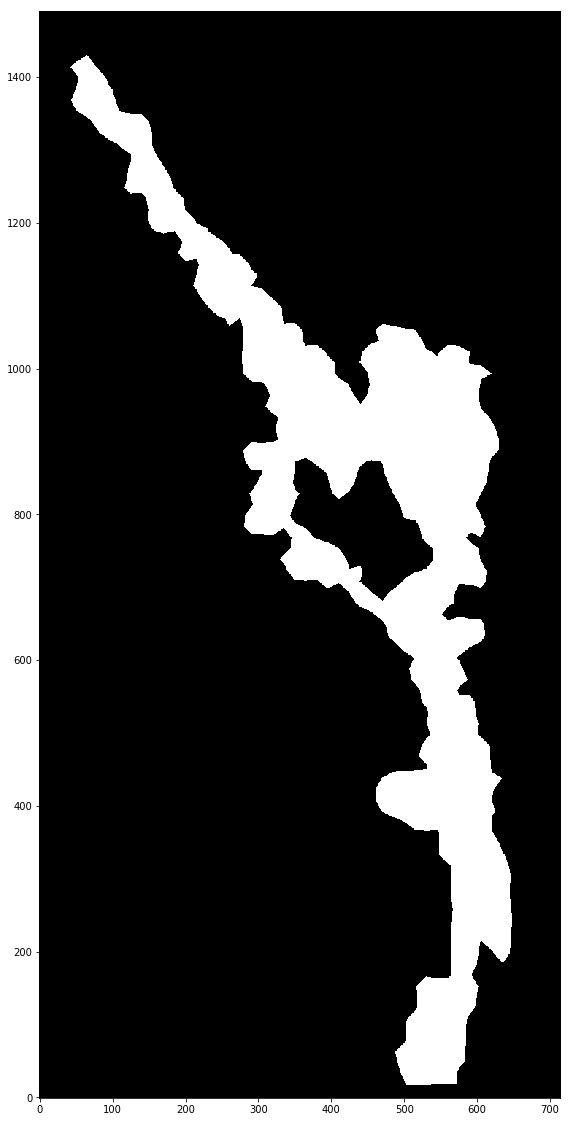

In [21]:
from astropy.io import fits
import numpy as np
import pyregion
import matplotlib.pyplot as plt

%matplotlib inline

reg_name='Fil5_filmask.reg'
f=fits.open('C18O_integrated_image.fits')
r = pyregion.open(reg_name).as_imagecoord(f[0].header)
[innercontour,outercontour], text_list = r.get_mpl_patches_texts()

#create array to hold points inside the contour
filpoints=np.empty((0,2))

# calculate the x and y points possibly within the image
y_int=np.arange(0, f[0].data.shape[0])
x_int = np.arange(0, f[0].data.shape[1])

# create a list of possible coordinates
g = np.meshgrid(x_int, y_int)
coords = list(zip(*(c.flat for c in g)))

# create the list of valid coordinates inside the outer contour but NOT inside the inner contour
filpoints = np.vstack((filpoints,np.vstack([p for p in coords if ((outercontour.contains_point(p, radius=0)==True) & (innercontour.contains_point(p,radius=0)==False))])))
    
#create image filled with zeros, and then set points inside mask to 1
filmask=np.zeros((f[0].data.shape))
filmask[filpoints[:,1].astype(int),filpoints[:,0].astype(int)]=1

#convert the integer mask to a boolean mask
filmask=filmask.astype(bool)
    
fig=plt.figure(figsize=(10,20))
plt.imshow(filmask,origin='lower',cmap='Greys_r')